In [1]:
from keras.models import Sequential
from keras.layers import Conv2D, ZeroPadding2D, Activation, Input, concatenate
from keras.models import Model
from keras.layers.normalization import BatchNormalization
from keras.layers.pooling import MaxPooling2D, AveragePooling2D
from keras.layers.merge import Concatenate
from keras.layers.core import Lambda, Flatten, Dense
from keras.initializers import glorot_uniform
from keras.engine.topology import Layer
from keras import backend as K
K.set_image_data_format('channels_first')
import pandas as pd
import cv2
import os
import numpy as np
from numpy import genfromtxt

import tensorflow as tf
from fr_utils import *
from inception_blocks_v2 import *
from facenet import *
from python_resize_image import *

import matplotlib.pyplot as plt # plt show pic
import matplotlib.image as mpimg # mpimg read pic

%matplotlib inline
%load_ext autoreload
%autoreload 2

np.set_printoptions(threshold=np.nan)#设置打印方式，设置打印输出数组的时候完全输出，不考虑中间数组数字用省略号代替

Using TensorFlow backend.


In [2]:
import sys,cv2,os
from PyQt5 import QtCore, QtGui, QtWidgets
from PyQt5.QtWidgets import QMainWindow, QDialog, QApplication
from FaceMainwindow import Ui_MainWindow
from Shot import Ui_Dialog
from Recognize import Ui_Dialog2


class Main(QMainWindow,Ui_MainWindow):
    def __init__(self):
        super().__init__()
        self.setupUi(self)
        self.pushButton.clicked.connect(self.Loadmodell)
        
    def Loadmodell(self):
        #FRmodel = faceRecoModel(input_shape=(3, 96, 96))
        FRmodel.compile(optimizer = 'adam', loss = triplet_loss, metrics = ['accuracy'])  
        #compile the model to configure the learning process 
        load_weights_from_FaceNet(FRmodel)
        print("Total Params:", FRmodel.count_params())
        #database = {}
        #database["jiapeng"] = img_to_encoding("images/jiapeng.jpg", FRmodel)
        #database["hummels"] = img_to_encoding("images/hummels0001.jpg", FRmodel)
        #plt.imshow(mpimg.imread('images/jiapeng1.jpg') )
        #verify("images/jiapeng1.jpg", "jiapeng", database, FRmodel)
        
class Child(QDialog,Ui_Dialog):
    def __init__(self):
        super().__init__()
        self.setupUi(self)
        self.pushButton.clicked.connect(self.Webcam)
        
    def OPEN(self):
        self.show()
    def Webcam(self):
        """use webcam to take photo"""
        cap = cv2.VideoCapture(0)
        filename = self.lineEdit.text()
        path = "C:\MyGitHub\Testface\Camerapictures\\" + filename + ".jpg"
        print (path)
        while(1):
        # get a frame
            ret,frame = cap.read()
            # show a frame
            cv2.imshow("capture", frame)
            if cv2.waitKey(1) & 0xFF == ord('q'):
                cv2.imwrite(path, frame)
                break
        cap.release()
        cv2.destroyAllWindows()
        imageresize(filename)
        path = "images/" + filename + ".jpg"
        
        database[filename] = img_to_encoding(path, FRmodel)
    
        
        
class Child2(QDialog,Ui_Dialog2):
    def __init__(self):
        super().__init__()
        self.setupUi(self)
        self.pushButton.clicked.connect(self.Recog)
    def OPEN(self):
        self.show()
    def Recog(self):
        """use webcam to take photo"""
        cap = cv2.VideoCapture(0)
        path = "C:\MyGitHub\Testface\Camerapictures\cameraman.jpg"
        print (path)
        while(1):
        # get a frame
            ret,frame = cap.read()
            # show a frame
            cv2.imshow("capture", frame)
            if cv2.waitKey(1) & 0xFF == ord('q'):
                cv2.imwrite(path, frame)
                break
        cap.release()
        cv2.destroyAllWindows()
        imageresize("cameraman")
        plt.imshow(mpimg.imread('images/cameraman.jpg') )
        a,b,c=who_is_it("images/cameraman.jpg", database, FRmodel)
        self.lineEdit.setText(c)


Total Params: 3743280
C:\MyGitHub\Testface\Camerapictures\jiapeng111.jpg
C:\MyGitHub\Testface\Camerapictures\jiapeng111.jpg
C:\MyGitHub\Testface\Camerapictures\jiapeng111.jpg 640 480 73506
adjusted size: 128 96
C:\MyGitHub\Testface\input_images\jiapeng111.jpg
C:\MyGitHub\Testface\images\jiapeng111.jpg
C:\MyGitHub\Testface\Camerapictures\cameraman.jpg
C:\MyGitHub\Testface\Camerapictures\cameraman.jpg
C:\MyGitHub\Testface\Camerapictures\cameraman.jpg 640 480 73616
adjusted size: 128 96
C:\MyGitHub\Testface\input_images\cameraman.jpg
C:\MyGitHub\Testface\images\cameraman.jpg
it's jiapeng111, the distance is 0.3947683
C:\MyGitHub\Testface\Camerapictures\cameraman.jpg
C:\MyGitHub\Testface\Camerapictures\cameraman.jpg
C:\MyGitHub\Testface\Camerapictures\cameraman.jpg 640 480 83968
adjusted size: 128 96
C:\MyGitHub\Testface\input_images\cameraman.jpg
C:\MyGitHub\Testface\images\cameraman.jpg
Not in the database.
C:\MyGitHub\Testface\Camerapictures\cameraman.jpg
C:\MyGitHub\Testface\Camerapict

SystemExit: 0

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2969: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


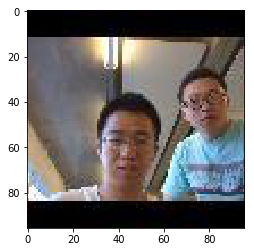

In [3]:
if __name__ == '__main__':  
    app = QtWidgets.QApplication(sys.argv)
    main = Main()
    child = Child()
    child2 = Child2()    
    FRmodel = faceRecoModel(input_shape=(3, 96, 96))
#     FRmodel.compile(optimizer = 'adam', loss = triplet_loss, metrics = ['accuracy'])  
#     compile the model to configure the learning process 
#     load_weights_from_FaceNet(FRmodel)
#     print("Total Params:", FRmodel.count_params())
    database = {}
    main.show()
    main.pushButton_1.clicked.connect(child.OPEN)
    main.pushButton_2.clicked.connect(child2.OPEN)
    #main.pushButton.clicked.connect(main.Loadmodell)
    #child.pushButton.clicked.connect(child.Webcam)
    sys.exit(app.exec_()) 
    

In [11]:
import os

fileaname = 'aa'
path = "C:\MyGitHub\Testface\GUI\\" + fileaname + ".jpg"
print (path)

C:\MyGitHub\Testface\GUI\aa.jpg
